In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [3]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


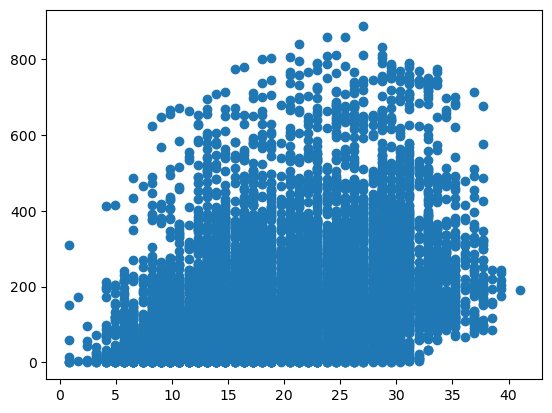

In [4]:
plt.scatter(bikes['temp'],bikes['registered'])

In [5]:
x = bikes['temp']
y = bikes['casual']

In [6]:
results = ols("casual ~ temp + humidity + workingday", data=bikes).fit()
print(results.summary())
# 43% of the dependent variable values are explained by the independent variables (features)
# the 4 features are all important features to preditc target feature as p<0.05
#  

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     2766.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:21:57   Log-Likelihood:                -54939.
No. Observations:               10886   AIC:                         1.099e+05
Df Residuals:                   10882   BIC:                         1.099e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.1426      1.663     31.961      0.0

In [7]:
"y_hat = 53.1426 + 2.9255temp - 0.8365humidity - 36.0416workingday"

'y_hat = 53.1426 + 2.9255temp - 0.8365humidity - 36.0416workingday'

In [8]:
53.1426 + (2.9255*9.84) - (0.8365*81) - (36.0416*0)

14.173019999999994

In [9]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
pred_vals = results.predict(bikes[['temp','humidity','workingday']])

In [11]:
pred_vals

0        14.175362
1        12.612922
2        12.612922
3        19.194189
4        19.194189
           ...    
10881    20.856745
10882    12.602536
10883     6.857740
10884     6.857740
10885     0.276474
Length: 10886, dtype: float64

In [12]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),bikes['casual']], axis=1)

In [13]:
res

,y_hat,casual
0,14.175362,3
1,12.612922,8
2,12.612922,5
3,19.194189,3
4,19.194189,0
...,...,...
10881,20.856745,7
10882,12.602536,10
10883,6.857740,4
10884,6.857740,12


In [14]:
res['error'] = res['y_hat'] - res['casual']

In [15]:
res.head(1)

,y_hat,casual,error
0,14.175362,3,11.175362


In [19]:
# alternative way to get the residual error (res['error'])
results.resid

0       -11.175362
1        -4.612922
2        -7.612922
3       -16.194189
4       -19.194189
           ...    
10881   -13.856745
10882    -2.602536
10883    -2.857740
10884     5.142260
10885     3.723526
Length: 10886, dtype: float64

In [16]:
res['sq_error'] = res['error']**2

In [17]:
np.sqrt(res['sq_error'].mean())

37.630976661566194

In [24]:
# another way to get the root MSE
np.sqrt((results.resid ** 2).mean())

37.630976661566194

In [18]:
# alternative way to get root RSE (residual standard error) 
np.sqrt(results.mse_resid)

37.63789221370789

In [22]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


(array([   9.,   18.,   48.,   95.,  160.,  315., 2110., 5562., 2344.,
         225.]),
 array([-278.91580946, -241.14950457, -203.38319967, -165.61689478,
        -127.85058988,  -90.08428498,  -52.31798009,  -14.55167519,
          23.2146297 ,   60.9809346 ,   98.7472395 ]),
 <BarContainer object of 10 artists>)

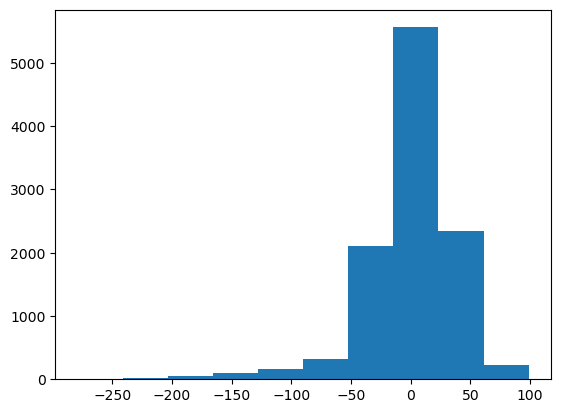

In [23]:
plt.hist(res['error'])

(array([7447., 1807.,  805.,  322.,  203.,  127.,   98.,   48.,   18.,
          11.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <BarContainer object of 10 artists>)

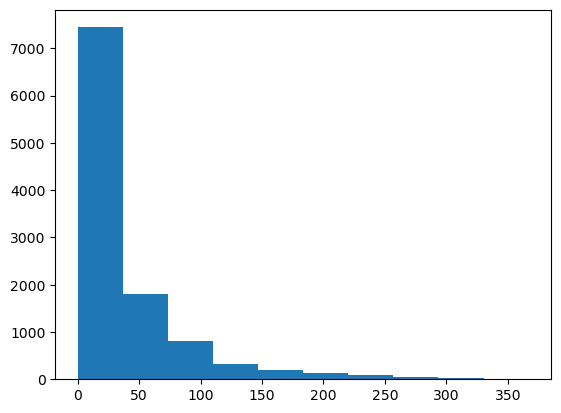

In [24]:
plt.hist(bikes['casual'])

In [25]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


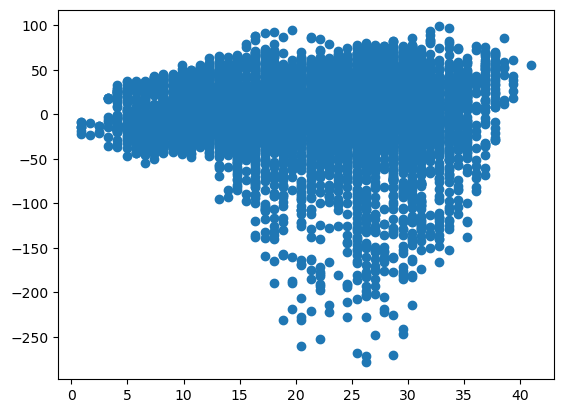

In [26]:
plt.scatter(bikes['temp'],res['error'])

# Residual plot
    1. To know if residuals are evenly spread. 

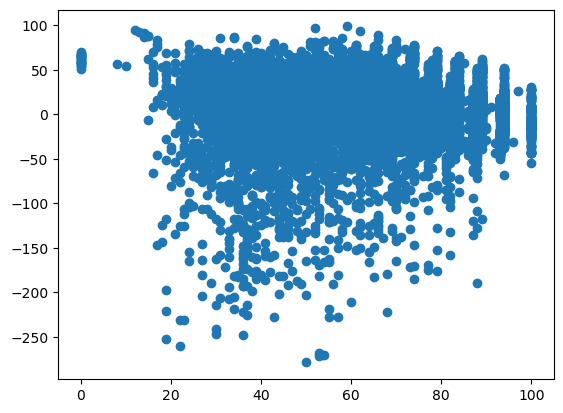

In [27]:
plt.scatter(bikes['humidity'],res['error'])
# under-predicting as spread of errors are not equal but vary lot

# Q-Q plot (prob plot)
    1. plot the prob distribution of the residual errors, check if the residuals are normally distributed. Because the linear regression assumes that the model will perform equally well (robust) no matter how the feature values change (produce equally good results throughout the scale of the input variables)

    2. Hence, the red line represents the normal distribution line (the more residual points located closer to the red line, the better the model's errors are normally distributed, the more robust the predictions / precisions of the linear model)  

    3. X-axis are the quantiles from the normal distribution, Y-axis are the quantitles of the residual errors generated by the linear model

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([-278.91580946, -271.42522287, -270.06496056, ...,   94.67880447,
           97.00144858,   98.7472395 ])),
 (35.25481020993883, 7.1368980746662e-14, 0.9365456663477384))

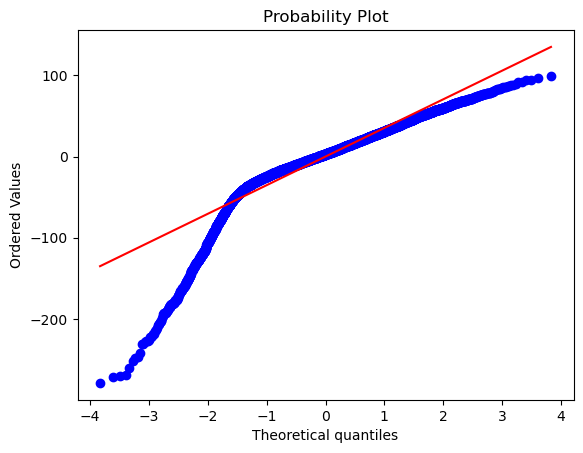

In [28]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

# ideally all errors should be on the red-line
# not on red line means errors are not normally distributed


# influence / leverage plot
    1. Only available in stats model but not in scikit learn
    2. Leverage (x-axis) influences the slope and the intercept of the line, residual error (y-axis) is the result / performance of the model. And the inflence is the size of the point
    3. The bigger the size of the point, the more influencial the point is. 
    4. Only remove the points on the top-right as it has high residual and high influence (but if a point has high leverage but low residual, then you might not remove it)
    5. The residual and leverage values are relative the scale of the dataset (relative statistics)
    6. Use 'cooks_d' to check if a record has high residual and high influence. If 'cooks_d' is closer to 1, then you should remove that record as it has high residual and high influence

    7. leverage is a measure of how extreme the input variable values are, while 

In [29]:
# takes some time as it computes every record for every input variable (namely this plot check how the linear model works with or without each of the record)
infl = results.get_influence()
infl.summary_frame()
# first record have low influence due to its small values
# identify important records using this methods
# 



,dfb_Intercept,dfb_temp,dfb_humidity,dfb_workingday,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.002088,0.003502,-0.002551,0.004024,1.135234e-05,-0.296994,0.000515,-0.006739,-0.296982,-0.006738
1,-0.000981,0.001573,-0.000984,0.001658,1.996754e-06,-0.122593,0.000531,-0.002826,-0.122588,-0.002826
2,-0.001620,0.002597,-0.001623,0.002736,5.438450e-06,-0.202321,0.000531,-0.004664,-0.202312,-0.004664
3,-0.003977,0.005157,-0.002407,0.005842,2.186977e-05,-0.430365,0.000472,-0.009353,-0.430348,-0.009353
4,-0.004714,0.006113,-0.002853,0.006924,3.072312e-05,-0.510090,0.000472,-0.011086,-0.510073,-0.011085
...,...,...,...,...,...,...,...,...,...,...
10881,-0.002906,0.002324,0.002299,-0.002460,7.083872e-06,-0.368198,0.000209,-0.005323,-0.368183,-0.005323
10882,-0.000409,0.000491,0.000195,-0.000466,2.282366e-07,-0.069153,0.000191,-0.000955,-0.069150,-0.000955
10883,-0.000384,0.000606,0.000067,-0.000516,2.865256e-07,-0.075935,0.000199,-0.001071,-0.075931,-0.001071
10884,0.000690,-0.001090,-0.000121,0.000928,9.277390e-07,0.136638,0.000199,0.001926,0.136632,0.001926


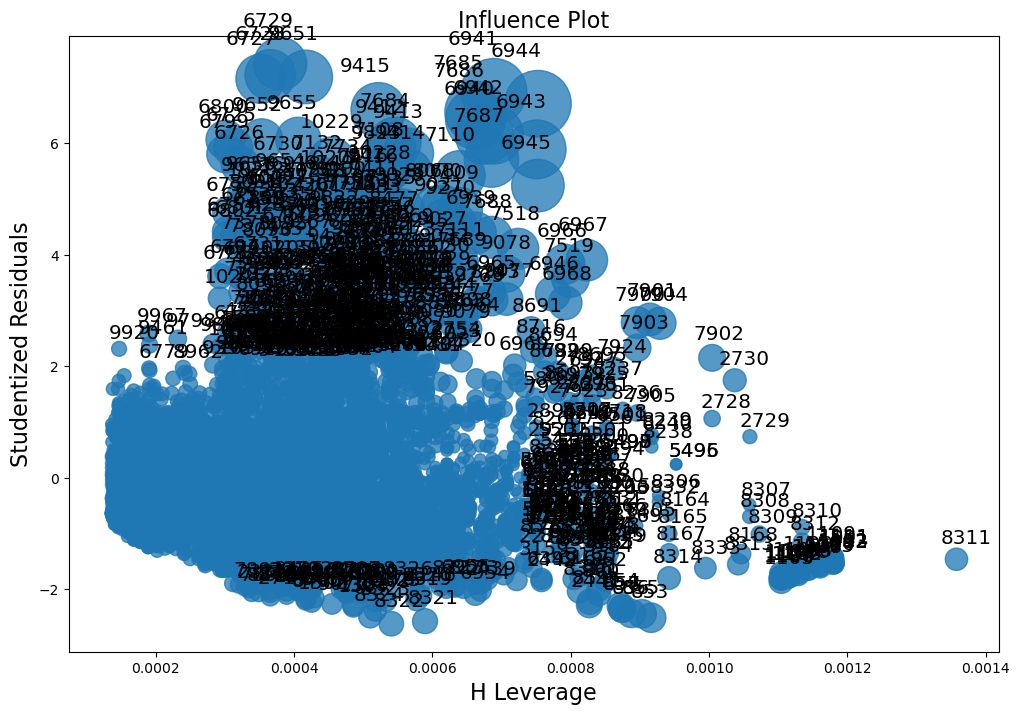

In [30]:
fig, ax = plt.subplots(figsize= (12,8))
fig = sm.graphics.influence_plot(results,ax=ax,criterion='cooks')
# number on the point is the row index of the record

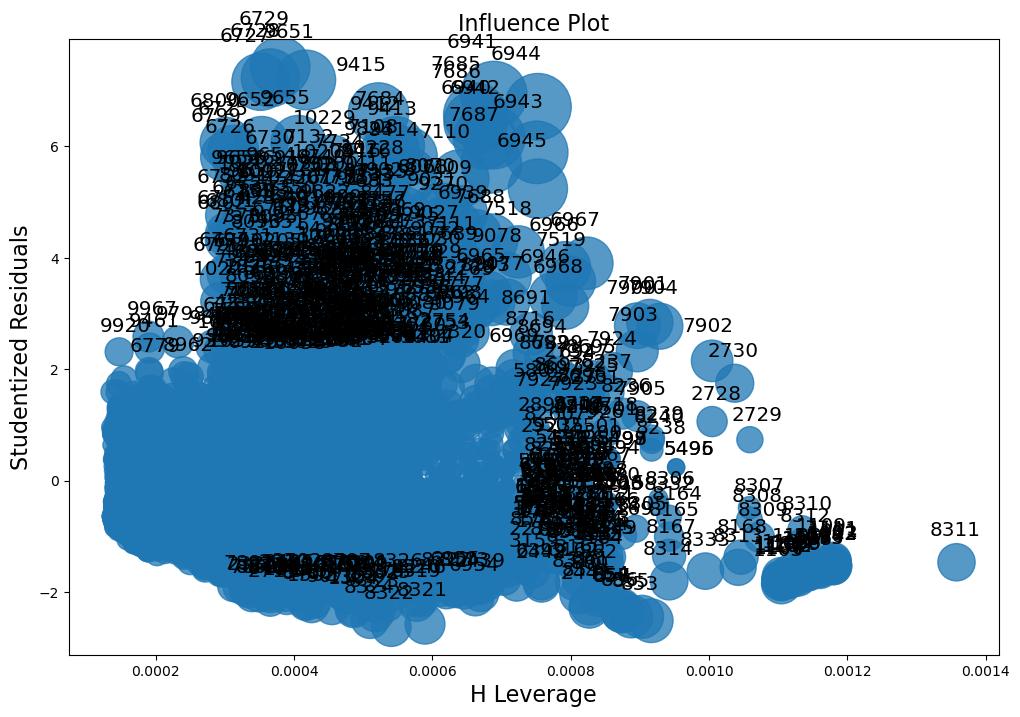

In [31]:
# for simplicity, just use 'cook' rather than 'DFFITS'
fig, ax = plt.subplots(figsize= (12,8))
fig = sm.graphics.influence_plot(results,ax=ax,criterion='DFFITS')

In [32]:
# covert numeric variables into categorical variables 
dummies_season = pd.get_dummies(bikes.season, dtype=int)
dummies_season

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
10881,0,0,0,1
10882,0,0,0,1
10883,0,0,0,1
10884,0,0,0,1


In [33]:
dummies_season.rename(columns={1:'w',2:'spr', 3:'sum', 4:'fall'}, inplace=True)

In [34]:
bikes = pd.concat([bikes, dummies_season],axis=1)

In [35]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,w,spr,sum,fall
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,0,0,0,1
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,0,0,0,1
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,0,0,0,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,0,0,0,1


In [36]:
results = ols("casual ~ w + spr + sum + fall", data=bikes).fit()
print(results.summary())
# not many are explained by the season, and p>0.05, meaning insignificance

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     258.5
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          1.66e-212
Time:                        02:24:43   Log-Likelihood:                -57530.
No. Observations:               10886   AIC:                         1.151e+05
Df Residuals:                   10881   BIC:                         1.151e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.667e+12   6.26e+12      0.266      0.7

# My practice

In [37]:
bikes['datetime'] = pd.to_datetime(bikes['datetime'])
bikes['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [38]:
bikes['datetime'].dt.hour

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: int32

In [39]:
dummies_hour = pd.get_dummies(bikes['datetime'].dt.time, dtype=int)
dummies_hour

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
bikes = pd.concat([bikes, dummies_hour],axis=1)
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,0,0,0,0,0,1,0,0,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,0,0,0,0,0,0,1,0,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,0,0,0,0,0,0,0,1,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,0,0,0,0,0,0,0,0,1,0


In [41]:
# Create function to categorize the numeric variable
def time_cat(x):
    if x >= 0 and x < 9:
        return 'night'
    elif x >= 9 and x < 18:
        return 'daytime'
    elif x >= 18 and x < 24:
        return 'evening'
    else:
        return 'error'

In [42]:
bikes['time_range'] = bikes['datetime'].dt.hour.apply(time_cat)

In [43]:
bikes = pd.concat([bikes, pd.get_dummies(bikes['time_range'], dtype=int)],axis=1)
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,time_range,daytime,evening,night
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,0,0,0,0,0,0,night,0,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,0,0,0,0,0,0,night,0,0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,0,0,0,0,0,0,night,0,0,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,0,0,0,0,0,0,night,0,0,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,0,0,0,0,0,0,night,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,0,1,0,0,0,0,evening,0,1,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,0,0,1,0,0,0,evening,0,1,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,0,0,0,1,0,0,evening,0,1,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,0,0,0,0,1,0,evening,0,1,0


In [44]:
results = ols("casual ~ daytime + evening + night", data=bikes).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     1206.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:24:43   Log-Likelihood:                -56461.
No. Observations:               10886   AIC:                         1.129e+05
Df Residuals:                   10882   BIC:                         1.130e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.062e+11    1.2e+13     -0.009      0.9

# Scikit Learn Implementation of Linear Regression
    1. you cannot do above graphs in sklearn 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge,Lasso


In [46]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [47]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [48]:
# Step 1: identify independent & dependent variables (never hard-code anything in pipeline)
# separate cat and num features as we will apply different pre-processing methods to these 2 types of features
cat_features = ['workingday','season','weather' ]
num_features = ['temp','humidity','windspeed'] # cannot include 'atemp' to avoid colinearity within features for the sake of linear model
target = 'casual'
# you need to some pre-analysis to determine the desirable independent variables

In [49]:
bikes[cat_features + num_features]

,workingday,season,weather,temp,humidity,windspeed
0,0,1,1,9.84,81,0.0000
1,0,1,1,9.02,80,0.0000
2,0,1,1,9.02,80,0.0000
3,0,1,1,9.84,75,0.0000
4,0,1,1,9.84,75,0.0000
...,...,...,...,...,...,...
10881,1,4,1,15.58,50,26.0027
10882,1,4,1,14.76,57,15.0013
10883,1,4,1,13.94,61,15.0013
10884,1,4,1,13.94,61,6.0032


In [50]:
X_train, X_test, y_train, y_test = train_test_split(bikes[cat_features + num_features], bikes[target], 
                                                    test_size=0.3, random_state=1234)
# use random_state to ensure your train_test partition is replicable (same train & test sets every time)

In [51]:
# Step 2: Preprocessing
# one hot encoding for cat_features, minMaxScaler for num_features 
# (minMaxScaler ensure the feature to range between 0 and 1, preserving the original distribution of the features)
# 

# you can also use imputer for missing value filling in the pipeline
# simple imputer to fill in missing values with the mean, median, mode
# Note: train the imputer only on the training dataset (ex: mean is computed from the training set, not including the test set)
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'),
                                   )]) # ignore the missing values
num_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])



### When Prefer minmax than standard scaler
    1. Context depending: Standard scaler can produce negative results, if you cannot accept negative values, use minmax
    2. Use standard scaler if you want the feature values to be normally distributed rather than the original distribution (minMaxScaler ensure the input features to range between 0 and 1, preserving the original distribution of the features) -> Standard scaler transform feature into normal distribution, minmax transform features into their own distribution but restrict their values to the range of 0 to 1
    
    3. Try both and see the outcome improvement
    4. Use standard scaler for linear regression as this model assumes the residual errors to be normally distributed (as the standard scaler transforms all the feature values to be normal distributed, ensuring the prediction results to be normal distributed as well, and so normally distributed residual errors)


In [52]:
# still in building the pipeline
preprocessor = ColumnTransformer(transformers=[('cat', cat_transformer, cat_features),
                                                ('num',num_transformer,num_features)])

In [53]:
# model pipeline building finished 
linear_reg =  Pipeline(steps=[
    ('preprocessor', preprocessor), # do the pre-processing first on all the input data
    ('regressor', LinearRegression()) # then fit the model on the pre-processed data
])

In [54]:
linear_reg.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', LinearRegression())])

In [55]:
pred = linear_reg.predict(X_test)
pred

array([  3.875,  53.5  ,  28.   , ..., -12.25 ,  10.125,  10.75 ])

In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(y_test, pred))

37.03511650531365

# Use regularization method to select the optimal features (feature selection)
    1. Ridge (L2 regularization): Apply penalty terms to all the features, for the unimportant features, the terms will become small, leading the unimportant features to have low values, reducing the impact of the unimportant features in the model fitting
    2. Lasso (L1 regularization): remove all unimportant features (0 coefficient terms assigned to the features)
    3. ElasticNet: Combine L1 and L2 -> Optimal method (you can always start by ElasticNet), but less efficient and slow (may not suitable for your business context)
    4. Use Lasso if you assure that you do not want to include all the training features 

### Ridge, Lasso, and ElasticNet are also linear models in nature (like revised versions of linear regression)

Goal: Only keep the important features to avoid overfitting and reduce training time

In [57]:
# model pipeline building finished 
ridge_reg =  Pipeline(steps=[
    ('preprocessor', preprocessor), # do the pre-processing first on all the input data
    ('regressor', Ridge(alpha=1.0)) # then fit the Ridge model on the pre-processed data
    # hyper-parameter alpha = 1 means how much to penalize the coefficients assigned to the features in each iteration
    # values for alpha is [0, +inf]
])

In [58]:
ridge_reg.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', Ridge())])

In [59]:
pred = ridge_reg.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(pred, y_test))
# similar resutls to our original linear regression model

37.04064569146822

# Try lasso


In [61]:
# model pipeline building finished 
lasso_reg =  Pipeline(steps=[
    ('preprocessor', preprocessor), # do the pre-processing first on all the input data
    ('regressor', Lasso(alpha=1.0)) # then fit the Ridge model on the pre-processed data
    # hyper-parameter alpha = 1 means how much to penalize the coefficients assigned to the features in each iteration
    # values for alpha is [0, +inf]
])

In [62]:
lasso_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', Lasso())])

In [63]:
pred = lasso_reg.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))
# similar resutls to our original linear regression model, but worse than Ridge

38.05238582162613

# Try Elastic Net

In [64]:
# model pipeline building finished 
elastic_reg =  Pipeline(steps=[
    ('preprocessor', preprocessor), # do the pre-processing first on all the input data
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8)) # then fit the Ridge model on the pre-processed data
    # l1_ratio means how much regularization are applied based on L1 (lasso). If l1_ratio=0.5, then both regularization methods contribute evenly to the coefficient results
    
    # hyper-parameter alpha = 1 means how much to penalize the coefficients assigned to the features in each iteration
    # values for alpha is [0, +inf]
])

In [65]:
elastic_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [66]:
pred = elastic_reg.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))
# worse than Lasso and Ridge

44.227784465068225